# Logistic Regression on Titanic Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Some columns have the same values, so removing those columns.
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)

In [5]:
data_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(f"Max value of age column : {data_2['age'].max()}")
print(f"Min value of age column : {data_2['age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


In [7]:
bins = [0, 5, 17, 23, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)

In [8]:
pd.DataFrame(data_2['age'].value_counts())

,age
Adult,404
Young,133
Kid,69
Old,64
Infant,44


In [9]:
# We have null values in age column
data_3 = data_2['age'].mode()[0]
data_3

'Adult'

In [10]:
# fill the null values with the mode of this column
data_4 = data_2.fillna({'age' : data_2['age'].mode()[0]})

In [11]:
data_2['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
print(f"How many 'S' on embarked column : {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [13]:
data_3 = data_2.fillna({'embarked' : 'S'})

data_4[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')

,survived
pclass,
2,87
3,119
1,136


In [14]:
data_4[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived')

,survived
sex,
male,109
female,233


In [15]:
bins = [0, 8, 15, 31, 513]
labels = ['low', 'medium-low', 'medium', 'high']
data_4['fare'] = pd.cut(data_4["fare"], bins = bins, labels = labels)

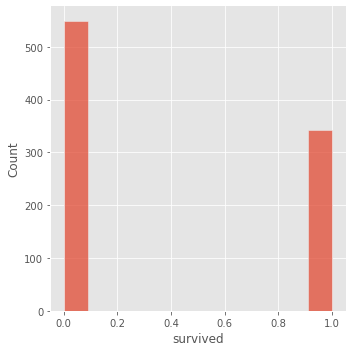

In [16]:
# pclass and class represents the same thing therefore drop class.
data_5 = data_4.drop('class', axis=1)

sns.displot(data_5['survived'])

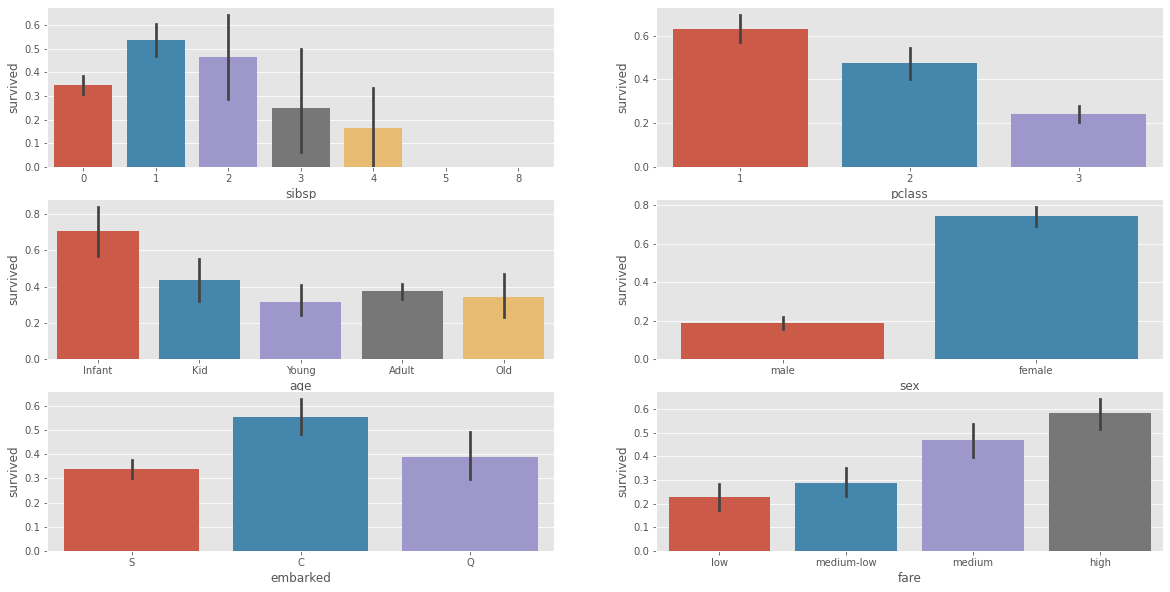

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data_5)
plt.subplot(322)
sns.barplot(x = 'pclass', y = 'survived', data = data_5)
plt.subplot(323)
sns.barplot(x = 'age', y = 'survived', data = data_5)
plt.subplot(324)
sns.barplot(x = 'sex', y = 'survived', data = data_5)
plt.subplot(325)
sns.barplot(x = 'embarked', y = 'survived', data = data_5);
plt.subplot(326)
sns.barplot(x = 'fare', y = 'survived' , data = data_5);

In [18]:
data_5

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,Young,1,0,low,S
1,1,1,female,Adult,1,0,high,C
2,1,3,female,Adult,0,0,low,S
3,1,1,female,Adult,1,0,high,S
4,0,3,male,Adult,0,0,medium-low,S
...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,medium-low,S
887,1,1,female,Young,0,0,medium,S
888,0,3,female,Adult,1,2,medium,S
889,1,1,male,Adult,0,0,medium,C


## We'll use get_dummies to convert non-numeric values to numeric values.

In [19]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummies_data = pd.get_dummies(data_5[dummies])

In [20]:
dummies_data.shape
dummies_data

,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,0,0,1,0,0,0,0,1,0,0,0,1,1,0
889,0,0,1,0,0,0,0,1,0,1,0,0,0,1


### We will concat two data frames, and drop the old columns.

In [21]:
data_6 = pd.concat([data_5, dummies_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Spliting into Train and Test dataset

In [23]:
X = data_6.drop('survived', axis = 1)
y = data_6['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

# X contains independent values, y contains dependent value

In [24]:
X

,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
3,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,3,1,2,0,0,1,0,0,0,0,1,0,0,0,1,1,0
889,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


## Training the model

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_2 = log_reg.predict_proba(X_test)
y_test

126    0
354    0
590    0
509    1
769    0
      ..
343    0
614    0
360    0
272    1
739    0
Name: survived, Length: 295, dtype: int64

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [27]:
# predict_proba gives us the probability estimates.
# In this 2d array, the y_pred_2[:, 0] gives the probability of not surviving and y_pred_2[:, 1] gives the probability of surviving.
y_pred_2

array([[0.86100402, 0.13899598],
       [0.85918325, 0.14081675],
       [0.88891627, 0.11108373],
       [0.9107011 , 0.0892989 ],
       [0.93197981, 0.06802019],
       [0.64723787, 0.35276213],
       [0.07787147, 0.92212853],
       [0.88964358, 0.11035642],
       [0.04303313, 0.95696687],
       [0.93197981, 0.06802019],
       [0.8669632 , 0.1330368 ],
       [0.57073715, 0.42926285],
       [0.9107011 , 0.0892989 ],
       [0.17490275, 0.82509725],
       [0.89525378, 0.10474622],
       [0.23909257, 0.76090743],
       [0.92079885, 0.07920115],
       [0.46531137, 0.53468863],
       [0.89525378, 0.10474622],
       [0.83379532, 0.16620468],
       [0.88012558, 0.11987442],
       [0.28235089, 0.71764911],
       [0.1391381 , 0.8608619 ],
       [0.24841764, 0.75158236],
       [0.44742064, 0.55257936],
       [0.88891627, 0.11108373],
       [0.55249708, 0.44750292],
       [0.64723787, 0.35276213],
       [0.89525378, 0.10474622],
       [0.76514862, 0.23485138],
       [0.

## Accuracy of the model

In [28]:
accuracy_score(y_pred, y_test)

0.823728813559322

In [29]:
# This gives us the probabilty of surviving.
y_pred_2[:,1]

array([0.13899598, 0.14081675, 0.11108373, 0.0892989 , 0.06802019,
       0.35276213, 0.92212853, 0.11035642, 0.95696687, 0.06802019,
       0.1330368 , 0.42926285, 0.0892989 , 0.82509725, 0.10474622,
       0.76090743, 0.07920115, 0.53468863, 0.10474622, 0.16620468,
       0.11987442, 0.71764911, 0.8608619 , 0.75158236, 0.55257936,
       0.11108373, 0.44750292, 0.35276213, 0.10474622, 0.23485138,
       0.10473886, 0.80913331, 0.89562806, 0.13899598, 0.93950662,
       0.6675004 , 0.15913592, 0.49658421, 0.06396275, 0.06802019,
       0.01749811, 0.66765757, 0.06802019, 0.16814612, 0.11108373,
       0.10934352, 0.80435289, 0.82509725, 0.40439265, 0.03182496,
       0.34103673, 0.75158236, 0.89071769, 0.06099975, 0.13868342,
       0.11108373, 0.34110107, 0.01749811, 0.14081675, 0.76090743,
       0.48941344, 0.28398459, 0.55257936, 0.14081675, 0.71764911,
       0.17892622, 0.11108373, 0.18648939, 0.42926285, 0.07866411,
       0.76090743, 0.06802019, 0.76090743, 0.14081675, 0.64815

In [30]:
import numpy as np

In [31]:
# Using RMSLE => Root Mean Square Logarithmic Error
error = np.square(np.log10(y_pred_2[:,1] +1) - np.log10(y_test +1)).mean() ** 0.5
error

0.10946311713762852

In [32]:
# Accuracy of the model.
# Subtract error from 1 and multiplying by 100.

print("Accuracy is the model", (1-error)*100, "%")

Accuracy is the model 89.05368828623715 %


### Accuracy : 89%

## Plotting Graph 

<AxesSubplot:ylabel='fare_high'>

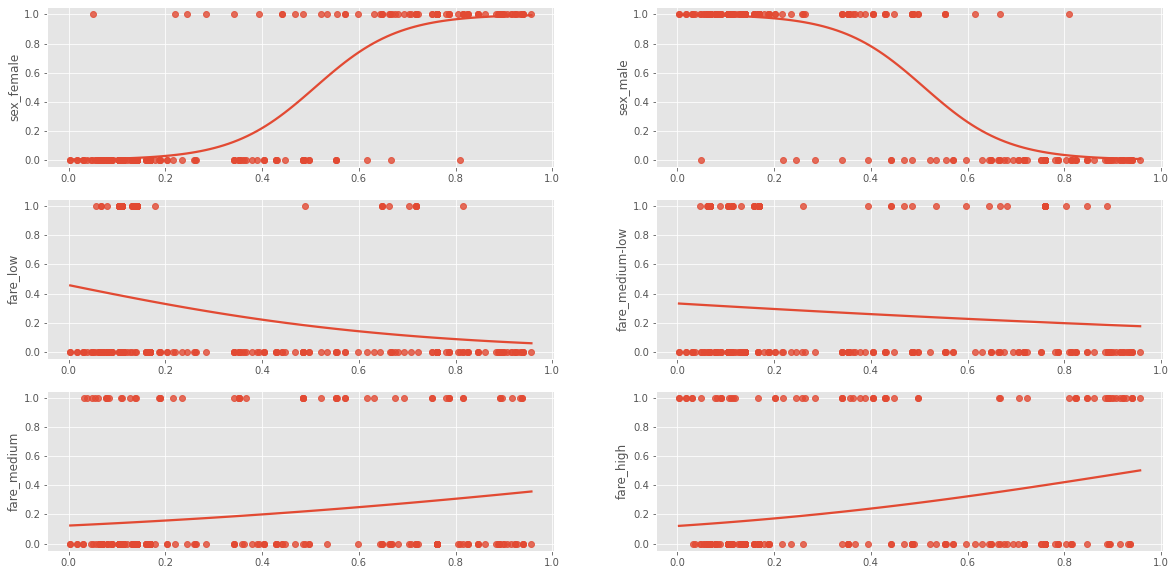

In [44]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.regplot(x=y_pred_2[:,1], y=X_test['sex_female'], logistic=True, ci=None)
plt.subplot(322)
sns.regplot(x=y_pred_2[:,1], y=X_test['sex_male'], logistic=True, ci=None)
plt.subplot(323)
sns.regplot(x=y_pred_2[:,1], y=X_test['fare_low'], logistic=True, ci=None)
plt.subplot(324)
sns.regplot(x=y_pred_2[:,1], y=X_test['fare_medium-low'], logistic=True, ci=None)
plt.subplot(325)
sns.regplot(x=y_pred_2[:,1], y=X_test['fare_medium'], logistic=True, ci=None)
plt.subplot(326)
sns.regplot(x=y_pred_2[:,1], y=X_test['fare_high'], logistic=True, ci=None)

<AxesSubplot:ylabel='embarked_S'>

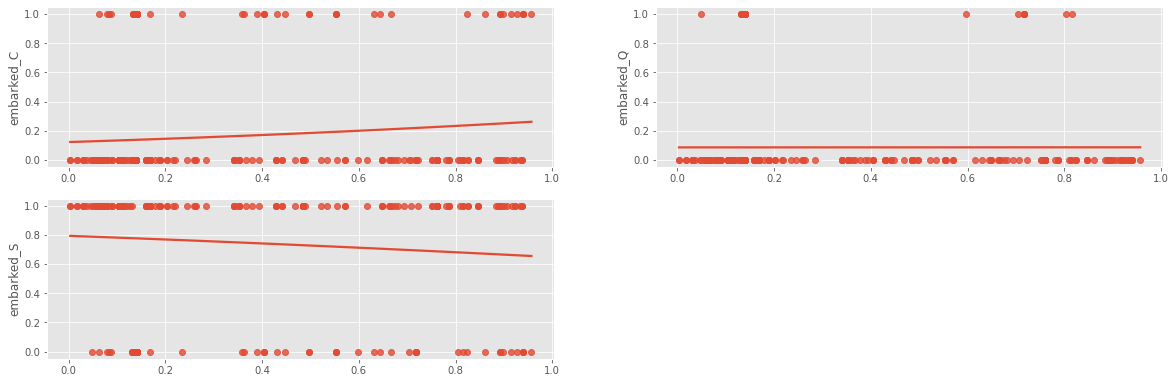

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.regplot(x=y_pred_2[:,1], y=X_test['embarked_C'], logistic=True, ci=None)
plt.subplot(322)
sns.regplot(x=y_pred_2[:,1], y=X_test['embarked_Q'], logistic=True, ci=None)
plt.subplot(323)
sns.regplot(x=y_pred_2[:,1], y=X_test['embarked_S'], logistic=True, ci=None)